**Connect Google Drive:**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries:**

In [26]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

**Load Dataset:**


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Machine Learning Track/Datasets/loan_approval_dataset.csv")

# display first few rows
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


**Handle missing values:**

In [ ]:
df.fillna({
    'no_of_dependents': df['no_of_dependents'].mode()[0],
    'education': df['education'].mode()[0],
    'self_employed': df['self_employed'].mode()[0],
    'income_annum': df['income_annum'].median(),
    'loan_amount': df['loan_amount'].median(),
    'loan_term': df['loan_term'].median(),
    'cibil_score': df['cibil_score'].median(),
    'residential_assets_value': df['residential_assets_value'].median(),
    'commercial_assets_value': df['commercial_assets_value'].median(),
    'luxury_assets_value': df['luxury_assets_value'].median(),
    'bank_asset_value': df['bank_asset_value'].median(),
    }, inplace=True)

#Dynamic handling

# Numeric
#df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical
#for col in categorical_cols:
#    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


**Label Encoding:**

In [ ]:
# Step 4: Encode categorical features
label_enc = LabelEncoder()
df['education'] = label_enc.fit_transform(df['education'])  # Graduate=1, Not Graduate=0
df['self_employed'] = label_enc.fit_transform(df['self_employed'])  # Yes=1, No=0
df['loan_status'] = label_enc.fit_transform(df['loan_status'])  # Approved=1, Rejected=0

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


**Feature and target variables:**

In [ ]:
# Step 5: Define features and target
X = df.drop(columns=['loan_id', 'loan_status'])
y = df['loan_status']

**Split dataset:**

In [ ]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


**Standardization:**

In [ ]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Handle Imbalance data:**

In [ ]:
# Step 8: Handle Imbalanced Data with SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

**Training logistic regression:**

In [ ]:
# Step 9: Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_res, y_res)
y_pred_log = log_model.predict(X_test_scaled)


**Training Decision tree:**

In [ ]:
# Step 10: Train Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_res, y_res)
y_pred_tree = tree_model.predict(X_test_scaled)

**Model Evaluation:**

In [29]:
# Step 11: Evaluation
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       664
           1       0.90      0.92      0.91       404

    accuracy                           0.93      1068
   macro avg       0.92      0.93      0.93      1068
weighted avg       0.93      0.93      0.93      1068

Accuracy: 0.9297752808988764
=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       664
           1       0.97      0.96      0.97       404

    accuracy                           0.97      1068
   macro avg       0.97      0.97      0.97      1068
weighted avg       0.97      0.97      0.97      1068

Accuracy: 0.9737827715355806


**Confusion matrix:**

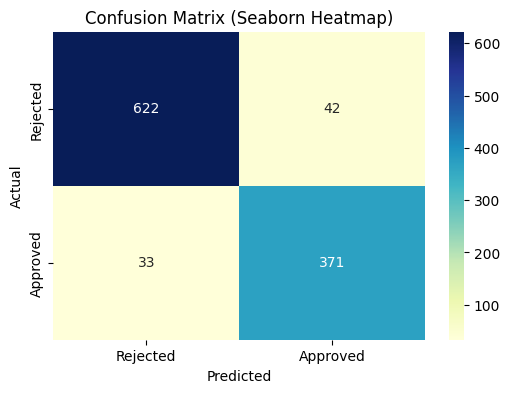

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get predictions
y_pred = log_model.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Seaborn Heatmap)')
plt.show()
